In [11]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
import os
import random
from sklearn import svm
from skimage import io, color, feature, data


def show(img):
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    ax.imshow(img, cmap=plt.cm.gray)
    ax.set_axis_off()
    plt.show()


In [3]:
image_dir_path = "frutas_dataset_train"
image_list = []
labels = []
image_limit_per_folder = 10

##Reads each image in subdirectories and stores it in image_list
##The directory names are used as labels for classification
current_image_count = 0
for image_dir in os.listdir(image_dir_path):
    full_path = os.path.join(image_dir_path,image_dir)
    
    if os.path.isdir(full_path):
        for image_file in os.listdir(full_path):
            image = io.imread(os.path.join(full_path,image_file))
            image_list.append(image)
            labels.append(image_dir)
            current_image_count += 1
            if(current_image_count >= image_limit_per_folder):
                current_image_count = 0
                break

print(labels)
#Takes about a billion years to be done

#for image in images:
#    show(image)

['agata_potato', 'agata_potato', 'agata_potato', 'agata_potato', 'agata_potato', 'agata_potato', 'agata_potato', 'agata_potato', 'agata_potato', 'agata_potato', 'asterix_potato', 'asterix_potato', 'asterix_potato', 'asterix_potato', 'asterix_potato', 'asterix_potato', 'asterix_potato', 'asterix_potato', 'asterix_potato', 'asterix_potato', 'cashew', 'cashew', 'cashew', 'cashew', 'cashew', 'cashew', 'cashew', 'cashew', 'cashew', 'cashew', 'diamond_peach', 'diamond_peach', 'diamond_peach', 'diamond_peach', 'diamond_peach', 'diamond_peach', 'diamond_peach', 'diamond_peach', 'diamond_peach', 'diamond_peach', 'fuji_apple', 'fuji_apple', 'fuji_apple', 'fuji_apple', 'fuji_apple', 'fuji_apple', 'fuji_apple', 'fuji_apple', 'fuji_apple', 'fuji_apple', 'granny_smith_apple', 'granny_smith_apple', 'granny_smith_apple', 'granny_smith_apple', 'granny_smith_apple', 'granny_smith_apple', 'granny_smith_apple', 'granny_smith_apple', 'granny_smith_apple', 'granny_smith_apple', 'honneydew_melon', 'honneydew

C:\Users\Pichau\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


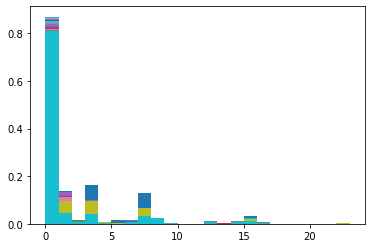

In [4]:
def extract_lbp(image,radius,n_points):
    ##Function for lbp feature extraction
    gray_image = color.rgb2gray(image)
    lbp = feature.local_binary_pattern(gray_image, n_points, radius)
    hist = plt.hist(lbp.ravel(),bins=np.arange(0, n_points),
                        range=(0, n_points),normed = True)[0]
    return hist

radius = 3
n_points = radius * 8

datasets = []
for image in image_list:
    datasets.append(extract_lbp(image,radius,n_points))

In [53]:
##SVM model generation
model = svm.LinearSVC(C=100)
model.fit(datasets,labels)

C:\Users\Pichau\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [61]:
##Test
test_image_count = 20
test_images = []
expected = []

predict = model.predict(datasets)

correct = 0
for i in range(len(predict)):
    print("Prediction: " + predict[i] + "  Expected: " + labels[i])
    if(predict[i] == labels[i]):
        correct += 1
        
print(str(correct) + "/" + str(len(predict)))


Prediction: agata_potato  Expected: agata_potato
Prediction: agata_potato  Expected: agata_potato
Prediction: agata_potato  Expected: agata_potato
Prediction: agata_potato  Expected: agata_potato
Prediction: agata_potato  Expected: agata_potato
Prediction: agata_potato  Expected: agata_potato
Prediction: agata_potato  Expected: agata_potato
Prediction: agata_potato  Expected: agata_potato
Prediction: agata_potato  Expected: agata_potato
Prediction: agata_potato  Expected: agata_potato
Prediction: granny_smith_apple  Expected: asterix_potato
Prediction: onion  Expected: asterix_potato
Prediction: onion  Expected: asterix_potato
Prediction: onion  Expected: asterix_potato
Prediction: onion  Expected: asterix_potato
Prediction: onion  Expected: asterix_potato
Prediction: onion  Expected: asterix_potato
Prediction: onion  Expected: asterix_potato
Prediction: onion  Expected: asterix_potato
Prediction: onion  Expected: asterix_potato
Prediction: kiwi  Expected: cashew
Prediction: kiwi  Expe